In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import numpy as np
import iris
import iris.coord_categorisation
import iris.quickplot as qplt
import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs



C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [78]:
## FIGURE OUT HOW TO MAKE THIS KWARGS
class Map:
    """
    Returns a heat map of oceanic currents
    """
    # Init Function 
    
    def __init__(self, data, **kwargs):
        self.data = data 
        self.params = {
           'latmin' : -91,
           'latmax' : 91,
           'longmin': 0,
           'longmax': 360,
           }
        self.params.update(kwargs)
        
        self.load()
        self.define()
        
    # Loads gridded data and defines the cubes of interest
    
    def load(self):
        self.current_cube = iris.load(self.data)
        self.ocean_surface_meridonal_currents = self.current_cube[2]
        self.ocean_surface_zonal_currents = self.current_cube[0]
        
    
    
    def define(self):
        # Creates meridonal and zonal 2-Dimensional cubes that can be graphed by latitude and longitude 
        self.data_meridonal = self.ocean_surface_meridonal_currents[0,0,:,:]
        self.data_zonal = self.ocean_surface_zonal_currents[0,0,:,:]
        
        # Creates x and y lists of longitude and latitude corrdinates 
        self.x = self.data_meridonal.coord('longitude').points
        self.x_scaled = self.data_meridonal.coord('longitude').points - 20
        self.test = [i for i in range(len(self.x_scaled)) if self.x_scaled[i] > 20]
        self.x_subsetted = self.x_scaled[self.test]
        self.y = self.data_meridonal.coord('latitude').points
        
        # Creates ranges to subset the lat and long points specified
        #self.longrange = [i for i in range(len(self.x)) if self.x[i] > self.longmin and self.x[i] < self.longmax]
        self.longmin_range = [i for i in range(len(self.x_subsetted)) if self.x_subsetted[i] >= self.params['longmin']]
        self.longmin = self.longmin_range[0]
        self.longmax_range = [i for i in range(len(self.x_subsetted)) if self.x_subsetted[i] <= self.params['longmax']]
        self.longmax = self.longmax_range[len(self.longmax_range)-1]
        self.latrange = [i for i in range(len(self.y)) if self.y[i] >= self.params['latmin'] and self.y[i] <= self.params['latmax']]
        
        # Creates a subsetted map with mins and maxes if **kwargsed         
        self.U_Meridonal = self.ocean_surface_meridonal_currents[0,0, self.latrange, self.longmin:self.longmax]
        self.V_Zonal = self.ocean_surface_zonal_currents[0,0, self.latrange,self.longmin:self.longmax]
   


    ### Creating Cartopy maps
    
    def zonal_map(self):
        qplt.contourf(self.V_Zonal, 25)
        plt.gca().coastlines()
        plt.show()
            
    def meridonal_map(self):
        qplt.contourf(self.U_Meridonal, 25)
        plt.gca().coastlines()
        plt.show()
        
    # Here add in the current heatmaps when the subsetting is sorted out
    def current_map(self):
        
        ulon = self.U_Meridonal.coord('longitude')
        vlon = self.V_Zonal.coord('longitude')

        # The longitude points go from 180 to 540, so subtract 360 from them
        # ulon.points = ulon.points - 360.0
        # vlon.points = vlon.points - 360.0

        # Create a cube containing the wind speed
        currentspeed = (self.U_Meridonal ** 2 + self.V_Zonal ** 2) ** 0.5
        currentspeed.rename('currentspeed')

        
        u = self.U_Meridonal.data
        v = self.V_Zonal.data

    
        # Plot the wind speed as a contour plot
        ax = plt.axes(projection = ccrs.PlateCarree())
        ax.coastlines()
        qplt.contourf(currentspeed, 20)
    

        # Add arrows to show the wind vectors
        plt.quiver(self.x, self.y, u, v, pivot='middle')

        plt.title("Global Current Speed")
        qplt.show()
    
        ## Next Graph for normalized vectors
    
        # Normalise the data for uniform arrow size
        #u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
        #v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)

        #plt.figure()
        #ax = plt.axes(projection=ccrs.PlateCarree())
    

        #qplt.contourf(windspeed, 20)

        #plt.quiver(x, y, u_norm, v_norm, pivot='middle')

        #plt.title("Current Vector Map")
        #qplt.show()
        


In [79]:
map = Map('/Users/PDSB/PDSB_Project/data/oscar_vel1992.nc', **{'longmin':168, 'longmax':172, 'latmin': -15, 'latmax':-13})

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1808: UserWarning: Ignoring netCDF variable 'latitude' invalid units 'degrees-north'
  warnings.warn(msg)
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1808: UserWarning:

In [80]:
print(map.x_subsetted)

[ 20.33333333  20.66666667  21.         ... 399.33333333 399.66666667
 400.        ]


C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\netcdf.py:395: RuntimeWarning: invalid value encountered in greater
  var = variable[keys]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

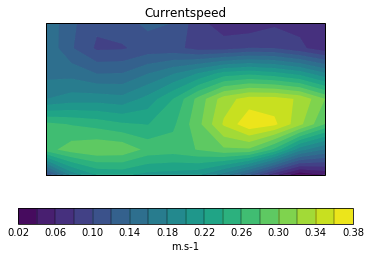

In [81]:
map.current_map()

In [37]:
cats = map.U_Meridonal.coord('longitude').points
cats

array([179.66666667, 180.        , 180.33333333, 180.66666667,
       181.        , 181.33333333, 181.66666667, 182.        ,
       182.33333333, 182.66666667, 183.        , 183.33333333,
       183.66666667, 184.        , 184.33333333, 184.66666667,
       185.        , 185.33333333, 185.66666667, 186.        ,
       186.33333333, 186.66666667, 187.        , 187.33333333,
       187.66666667, 188.        , 188.33333333, 188.66666667,
       189.        , 189.33333333, 189.66666667, 190.        ,
       190.33333333, 190.66666667, 191.        , 191.33333333,
       191.66666667, 192.        , 192.33333333, 192.66666667,
       193.        , 193.33333333, 193.66666667, 194.        ,
       194.33333333, 194.66666667, 195.        , 195.33333333,
       195.66666667, 196.        , 196.33333333, 196.66666667,
       197.        , 197.33333333, 197.66666667, 198.        ,
       198.33333333, 198.66666667, 199.        , 199.33333333,
       199.66666667, 200.        , 200.33333333, 200.66

In [19]:
map.x_subsetted

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       3.59333333e+02, 3.59666667e+02, 3.60000000e+02])

In [9]:
map2 = Map('/Users/PDSB/PDSB_Project/data/oscar_vel1992.nc', **{'longmin':20, 'longmax':390})

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1808: UserWarning: Ignoring netCDF variable 'latitude' invalid units 'degrees-north'
  warnings.warn(msg)
C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\_pyke_rules\compiled_krb\fc_rules_cf_fc.py:1808: UserWarning:

C:\Users\PDSB\Miniconda3\envs\py36\lib\site-packages\iris\fileformats\netcdf.py:395: RuntimeWarning: invalid value encountered in greater
  var = variable[keys]


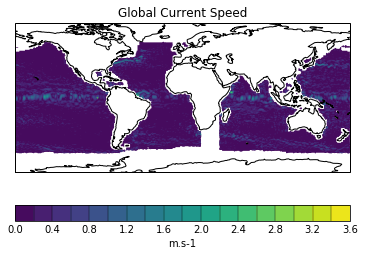

In [10]:
map2.current_map()

In [11]:
ulong = map.U_Meridonal.coord('longitude')
vlong = map.V_Zonal.coord('longitude')
# The longitude points go from 180 to 540, so subtract 360 from them
ulon.points = ulon.points - 360.0
vlon.points = vlon.points - 360.0

NameError: name 'ulon' is not defined

In [ ]:
cats = map.U_Meridonal.coord('longitude').points

In [ ]:
ulon.points

In [ ]:
map.U_Meridonal

In [ ]:
map.V_Zonal

In [ ]:
map.meridonal_map()

In [ ]:
map.zonal_map()

In [ ]:
brewer_cmap = mpl_cm.get_cmap('brewer_OrRd_09')
qplt.contourf(self.DMeridonal, brewer_cmap.N, cmap = brewer_cmap)
plt.gca().coastlines()
wind_speed = ((map.DMeridonal**2) * (map.DZonal**2))**.5
qplt.contourf(wind_speed, 25)
plt.gca().coastlines()
plt.show()